In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import pickle 
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
import sklearn
import lightgbm as lgb
print(sklearn.__version__)
print(lgb.__version__)


1.7.1
4.6.0


In [3]:
# Loading the dataset
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# Data Understanding 

### Dataset Column Descriptions

1. **customer_id**  
   - **Type:** Object (UUID)  
   - **Description:** A unique identifier assigned to each customer.

2. **age**  
   - **Type:** Integer  
   - **Description:** Age of the customer in years.

3. **gender**  
   - **Type:** Object (Categorical)  
   - **Possible Values:** `Male`, `Female`, `Other`  
   - **Description:** Gender of the customer.

4. **subscription_type**  
   - **Type:** Object (Categorical)  
   - **Possible Values:** `Basic`, `Standard`, `Premium`  
   - **Description:** The type of subscription plan the customer has.

5. **watch_hours**  
   - **Type:** Float  
   - **Description:** Total number of hours the customer has watched content.

6. **last_login_days**  
   - **Type:** Integer  
   - **Description:** Number of days since the customer's last login.

7. **region**  
   - **Type:** Object (Categorical)  
   - **Description:** Geographical region of the customer (e.g., Africa, Asia, Europe).

8. **device**  
   - **Type:** Object (Categorical)  
   - **Possible Values:** `Mobile`, `TV`, `Tablet`, `Desktop`  
   - **Description:** Primary device used to access the service.

9. **monthly_fee**  
   - **Type:** Float  
   - **Description:** Monthly subscription fee (in USD) for the customer.

10. **churned**  
    - **Type:** Integer (Binary)  
    - **Possible Values:** `0` = Not churned, `1` = Churned  
    - **Description:** Indicates whether the customer has churned (canceled their subscription).

11. **payment_method**  
    - **Type:** Object (Categorical)  
    - **Possible Values:** `Credit Card`, `Debit Card`, `Gift Card`, `PayPal`, etc.  
    - **Description:** The method used by the customer for payment.

12. **number_of_profiles**  
    - **Type:** Integer  
    - **Description:** Number of profiles associated with the customer's account.

13. **avg_watch_time_per_day**  
    - **Type:** Float  
    - **Description:** Average number of hours the customer watches per day.

14. **favorite_genre**  
    - **Type:** Object (Categorical)  
    - **Description:** The most frequently watched genre by the customer (e.g., Action, Drama, Comedy).


In [4]:
# Shape of the dataset
print("Shape of the data: ", df.shape)
print()
# Information about the dataset 
print(df.info())

Shape of the data:  (5000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float

In [5]:
# Describing the dataset
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [6]:
# Finding the missing values 
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [7]:
# Checking for duplicates 
df.duplicated().sum()

np.int64(0)

In [8]:
# Unique values checking 
for i in df.select_dtypes(include = 'object'):
    print("For column: ", i)
    print("No of uniques values: ", df[i].nunique())
    print("The unique values are: ", df[i].unique())
    print("---------------------------")

For column:  customer_id
No of uniques values:  5000
The unique values are:  ['a9b75100-82a8-427a-a208-72f24052884a'
 '49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b'
 '4d71f6ce-fca9-4ff7-8afa-197ac24de14b' ...
 '3f32e8c5-615b-4a3b-a864-db2688f7834f'
 '7b0ad82d-6571-430e-90f4-906259e0e89c'
 '82aeef39-ddb0-40ad-bae1-5c436e0cf042']
---------------------------
For column:  gender
No of uniques values:  3
The unique values are:  ['Other' 'Female' 'Male']
---------------------------
For column:  subscription_type
No of uniques values:  3
The unique values are:  ['Basic' 'Standard' 'Premium']
---------------------------
For column:  region
No of uniques values:  6
The unique values are:  ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
---------------------------
For column:  device
No of uniques values:  5
The unique values are:  ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
---------------------------
For column:  payment_method
No of uniques values:  5
The unique values are:  ['Gi

In [9]:
# Target variable 
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

In [10]:
df.groupby('churned')['monthly_fee'].mean()

churned
0    14.248350
1    13.125189
Name: monthly_fee, dtype: float64

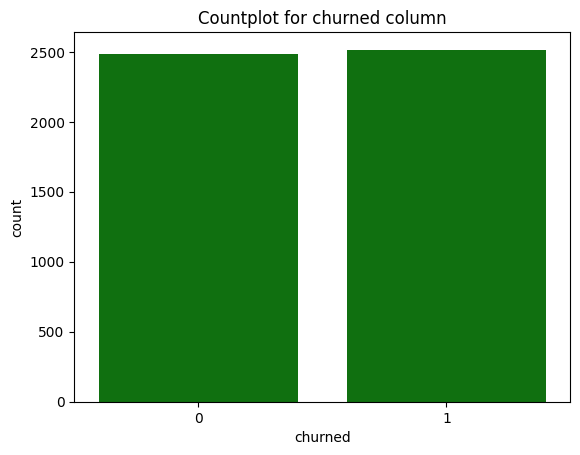

In [11]:
sns.countplot(x = 'churned', data = df, color = 'green')
plt.title("Countplot for churned column")
plt.show()

# Data Preprocessing

In [12]:
df = df.drop('customer_id', axis = 1)

In [13]:
# Data types handling
df.dtypes

age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object

### Handling ouliers

In [14]:
# Numerical columns 
print("Numerical Columns:")
for i in df.select_dtypes(include = ['int64', 'float64']):
    print(i)

Numerical Columns:
age
watch_hours
last_login_days
monthly_fee
churned
number_of_profiles
avg_watch_time_per_day


In [15]:
# Outliers in age column
df[(df['age']>100) | (df['age'] < 10)]

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In [16]:
# Function for finding the outliers 
def outliers(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    IQR = q3-q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [17]:
outliers_watch_hours = outliers(df, 'watch_hours')
outliers_watch_hours

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
15,32,Female,Premium,40.94,7,South America,Desktop,17.99,0,Crypto,1,5.12,Action
22,53,Other,Standard,43.02,43,South America,Tablet,13.99,0,Crypto,1,0.98,Action
44,27,Other,Premium,46.88,56,Oceania,TV,17.99,0,Crypto,3,0.82,Drama
49,42,Female,Basic,49.49,39,Europe,Mobile,8.99,0,Credit Card,5,1.24,Horror
57,31,Male,Basic,48.35,11,Oceania,Desktop,8.99,0,Debit Card,5,4.03,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,65,Female,Standard,70.99,36,Oceania,Mobile,13.99,0,Crypto,2,1.92,Horror
4968,41,Other,Basic,48.84,47,Asia,Tablet,8.99,0,PayPal,4,1.02,Romance
4979,27,Other,Basic,71.38,32,South America,Mobile,8.99,0,PayPal,5,2.16,Comedy
4989,69,Male,Standard,42.72,52,South America,Tablet,13.99,0,Crypto,3,0.81,Drama


Actually these are not outliers, because some people tacke the subsciption for watching all movies at once, so they can watch as much as they can. These are not considered as the outliers according to the this data.

In [18]:
# Getting the outliers from monthly_fee column
outliers_monthly_fee = outliers(df, 'monthly_fee')
outliers_monthly_fee

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In [19]:
# Removing the column avg_watch_time_per_day, cause it was calculated wrongly as watch_hours/last_login_days
df = df.drop('avg_watch_time_per_day', axis = 1)

# Exploratory Data Analysis

### Univariate Analysis 

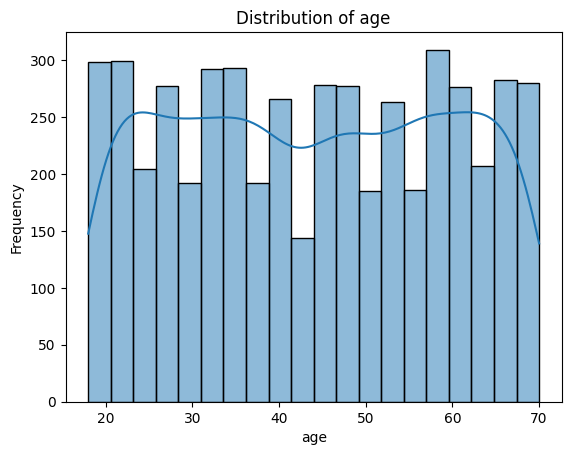

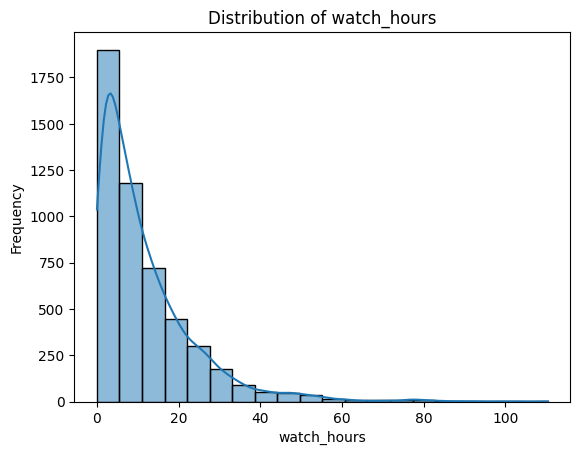

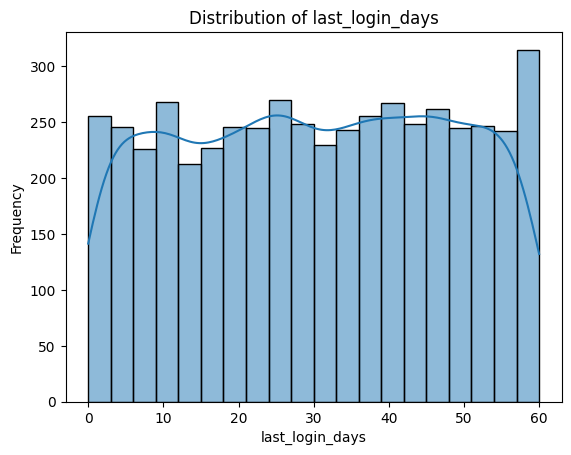

In [20]:
# Histogram for numerical columns 
num_cols = ['age', 'watch_hours', 'last_login_days']

for col in num_cols:
    sns.histplot(x = df[col], bins = 20, kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

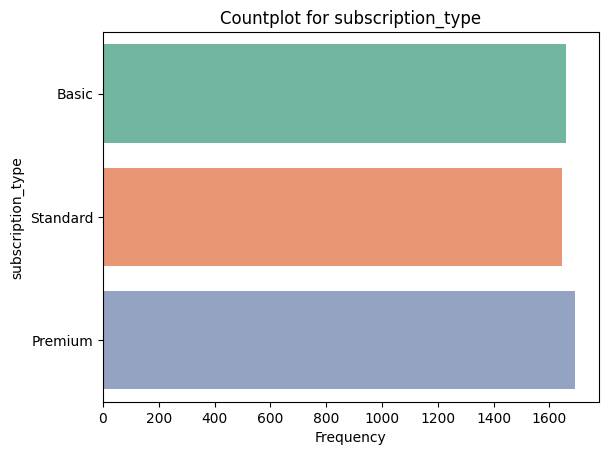

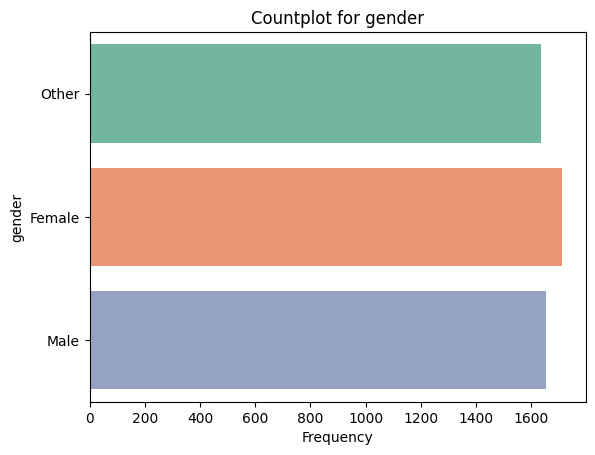

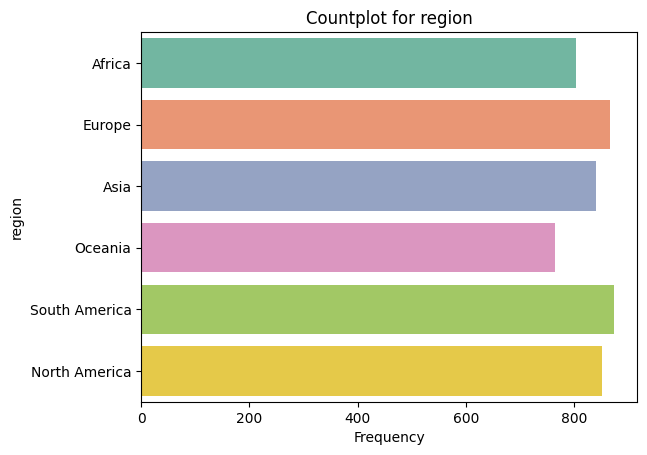

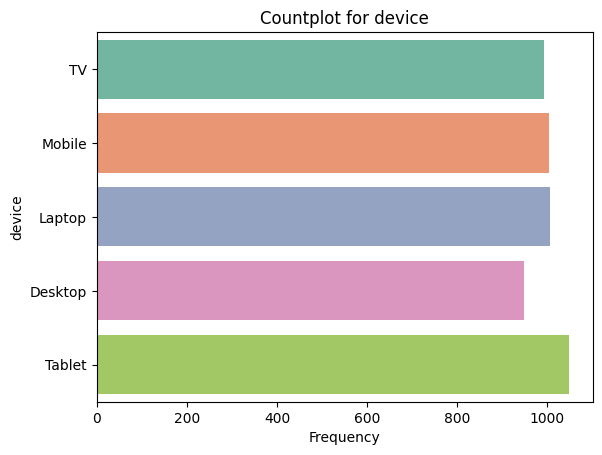

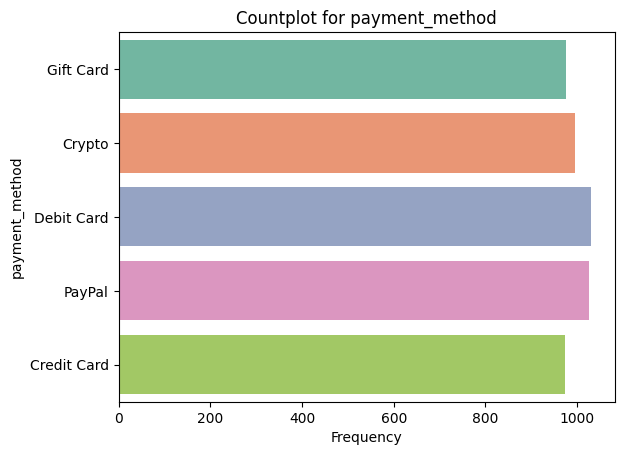

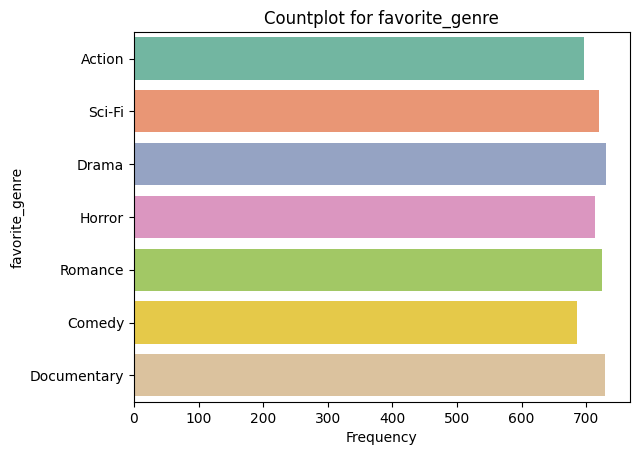

In [21]:
cat_cols = ['subscription_type','gender','region','device','payment_method','favorite_genre']

for col in cat_cols:
    sns.countplot(y = col, data = df, palette = 'Set2')
    plt.title(f"Countplot for {col}")
    plt.xlabel("Frequency")
    plt.ylabel(f"{col}")
    plt.show()

### Bivariate Analysis 

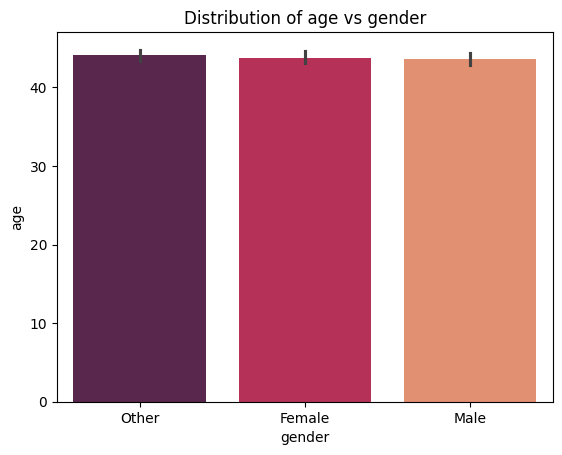

In [22]:
# Age vs Gender 
sns.barplot(data = df, x = 'gender', y = 'age', palette = 'rocket')
plt.title("Distribution of age vs gender")
plt.show()

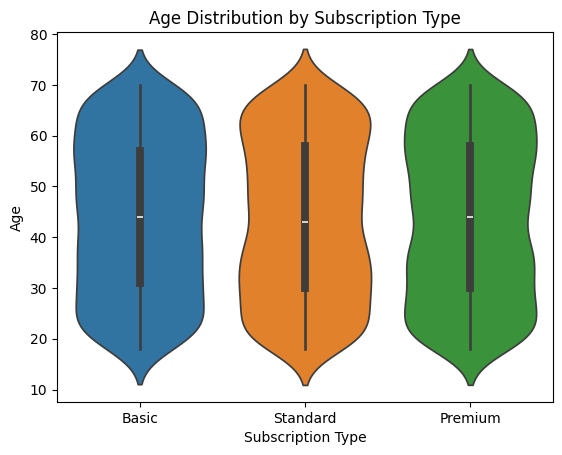

In [23]:
# Age vs subscription_type 
sns.violinplot(data=df, x='subscription_type', y='age', palette='tab10')
plt.title("Age Distribution by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Age")
plt.show()

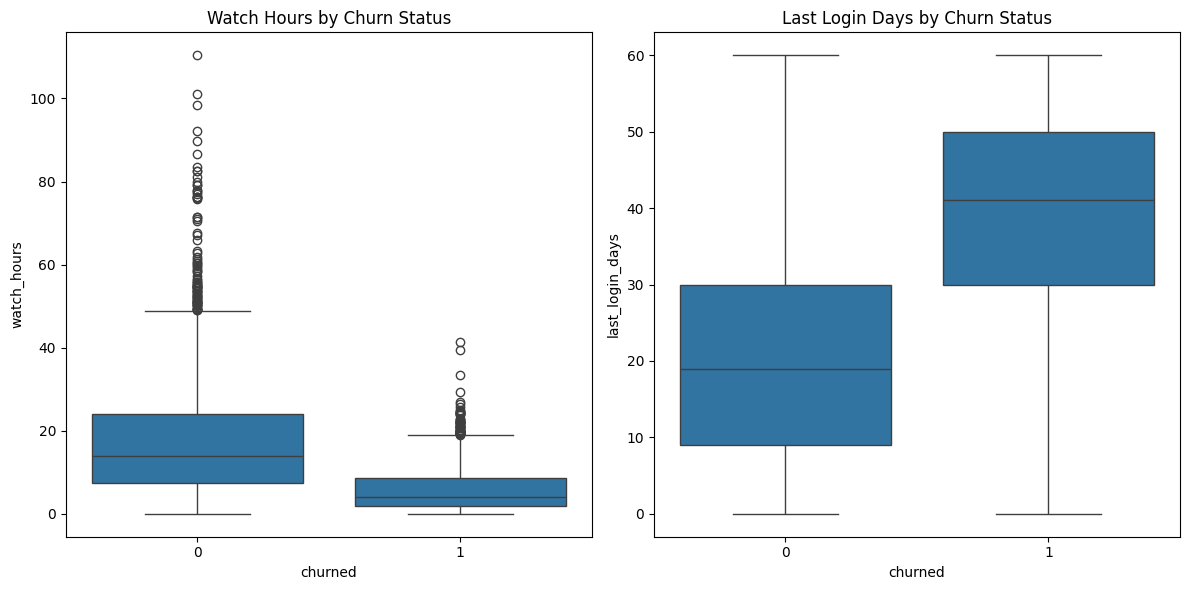

In [24]:
# Boxplot 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x = 'churned', y = 'watch_hours', data = df, ax = axes[0])
axes[0].set_title('Watch Hours by Churn Status')

sns.boxplot(x = 'churned', y = 'last_login_days', data = df, ax = axes[1])
axes[1].set_title('Last Login Days by Churn Status')

plt.tight_layout()
plt.show()

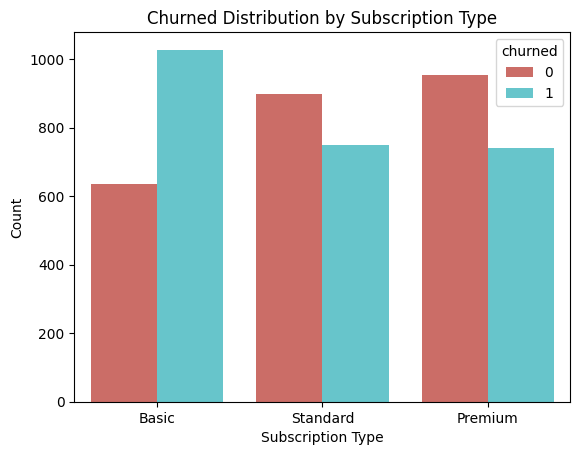

In [25]:
# churned distribution by subscription type
sns.countplot(data=df, x='subscription_type', hue='churned', palette='hls')
plt.title("Churned Distribution by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.show()

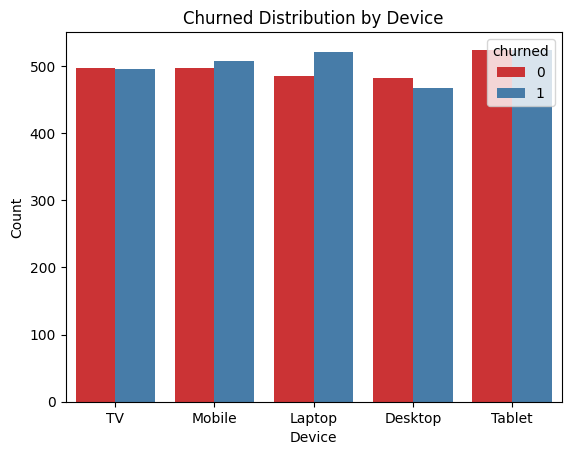

In [26]:
# Countplot 
sns.countplot(data = df, x = 'device', hue = 'churned', palette = 'Set1')
plt.title("Churned Distribution by Device")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

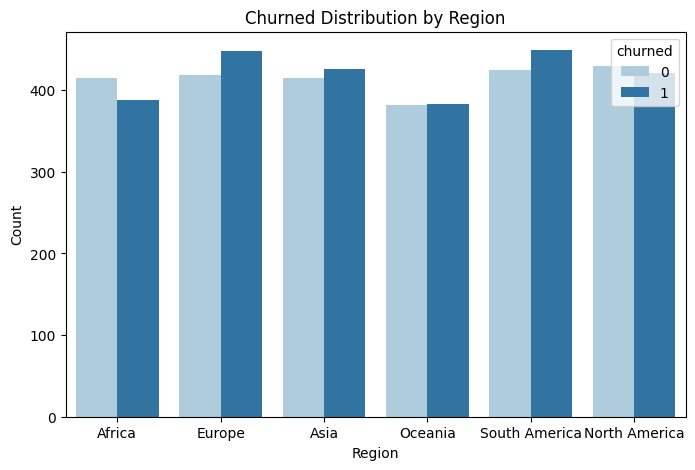

In [27]:
# Countplot for churned by region
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'region', hue = 'churned', palette = 'Paired')
plt.title("Churned Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

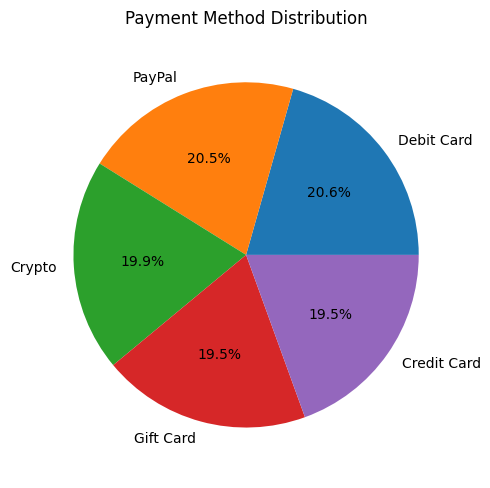

In [28]:
payment_counts = df['payment_method'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(payment_counts, 
        labels = payment_counts.index, 
        autopct = '%1.1f%%')
plt.title("Payment Method Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

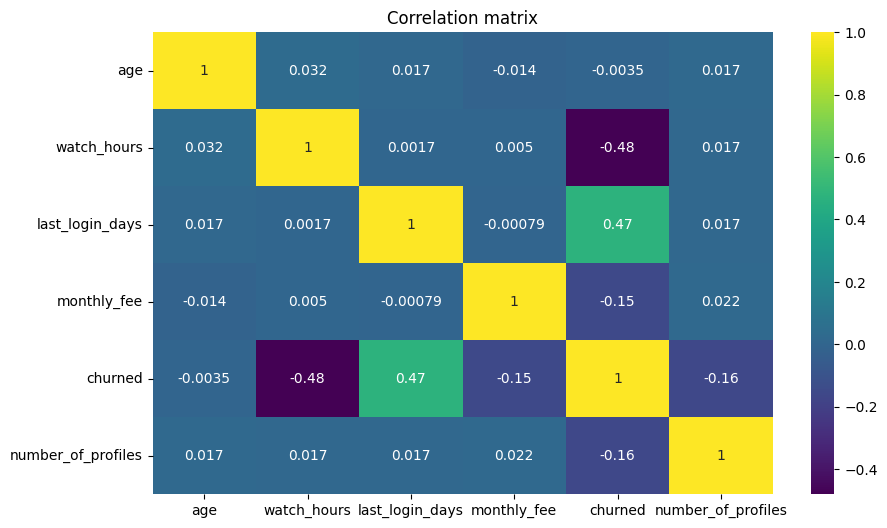

In [29]:
# Correlation matrix 
plt.figure(figsize = (10, 6))
df_corr = df[['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned',
       'number_of_profiles']].corr()
sns.heatmap(df_corr, annot = True, cmap = 'viridis')
plt.title("Correlation matrix")
plt.show()

### Multivariate Analysis  

In [30]:
# Age bukets 
df["customer_id"] = range(1, len(df) + 1)
bins = [18, 24, 30, 42, 54, 66, 70]
labels = ['18-24', '25-30', '31-42', '43-54', '55-66', '67-71']
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, right = True, include_lowest = True)
avg_age_group = df.groupby('age_group')['age'].mean()
print(avg_age_group)

age_group
18-24    21.042433
25-30    27.499112
31-42    36.293274
43-54    48.584186
55-66    60.545687
67-71    68.520325
Name: age, dtype: float64


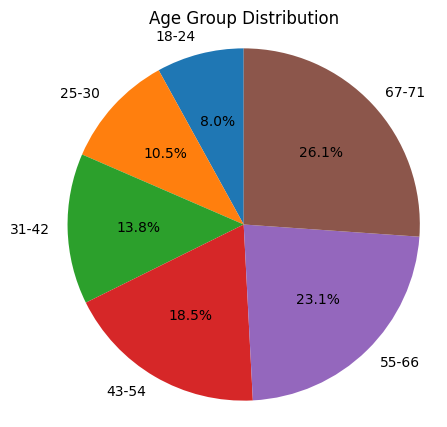

In [31]:
# Pie plot 
age_group_counts = avg_age_group
plt.figure(figsize = (5, 5))
plt.pie(age_group_counts, labels = age_group_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

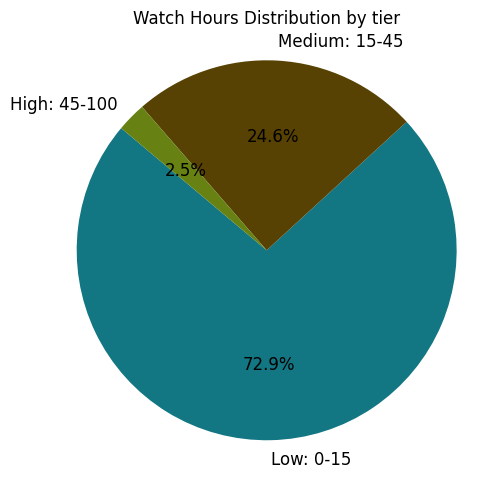

In [32]:
# Pie chart for watch_hours 
watch_time = df['watch_hours'].copy()

bins = [0, 15, 45, 100]
labels = ['Low: 0-15', 'Medium: 15-45', 'High: 45-100']

tiers = pd.cut(watch_time, bins = bins, labels = labels, right = False, include_lowest = True)
tier_counts = tiers.value_counts().reindex(labels)

low_view, medium_view, high_view = tier_counts.tolist()

# pie plot 
plt.figure(figsize = (5, 5))
plt.pie(tier_counts, labels = tier_counts.index, autopct = '%1.1f%%', startangle = 140, 
        colors = ['#127683', '#574203', '#678212'], textprops = {'fontsize': 12}
)
plt.title("Watch Hours Distribution by tier")
plt.axis('equal')
plt.tight_layout()
plt.show()

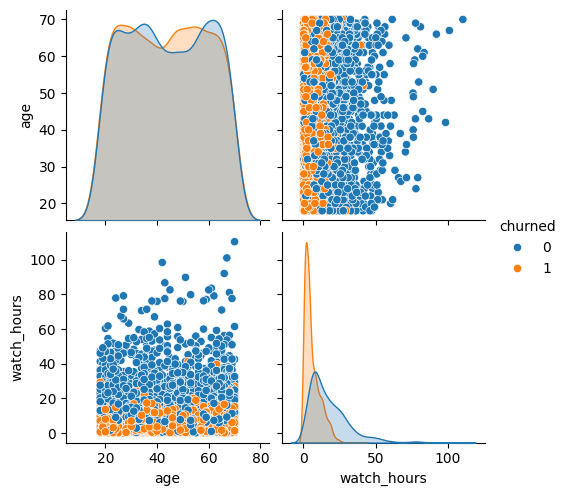

In [33]:
# Pairplot 
sns.pairplot(df, hue = 'churned', vars = ['age', 'watch_hours'])
plt.show()

# Data Preparation 

In [34]:
df = df.drop(columns = ['customer_id', 'age_group'])

In [35]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,Action


In [36]:
# Encoding the categorical columns for building the model
for col in df.select_dtypes(include = 'object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"\nColumn Name: {col}")
    for i, cls in enumerate(le.classes_):
        print(f"{cls} → {i}")


Column Name: gender
Female → 0
Male → 1
Other → 2

Column Name: subscription_type
Basic → 0
Premium → 1
Standard → 2

Column Name: region
Africa → 0
Asia → 1
Europe → 2
North America → 3
Oceania → 4
South America → 5

Column Name: device
Desktop → 0
Laptop → 1
Mobile → 2
TV → 3
Tablet → 4

Column Name: payment_method
Credit Card → 0
Crypto → 1
Debit Card → 2
Gift Card → 3
PayPal → 4

Column Name: favorite_genre
Action → 0
Comedy → 1
Documentary → 2
Drama → 3
Horror → 4
Romance → 5
Sci-Fi → 6


In [37]:
# Setting input(X) and output(y) values 
X = df.drop('churned', axis = 1)
y = df['churned']

# Data Modelling

In [38]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,favorite_genre
4227,54,2,1,9.80,56,3,4,17.99,1,4,5
4676,31,2,0,10.38,42,3,4,8.99,2,1,0
800,59,2,0,20.13,6,0,2,8.99,0,1,3
3671,45,0,0,9.77,16,1,1,8.99,3,2,5
4193,36,1,2,9.10,2,3,4,13.99,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...
4426,41,2,2,1.20,49,0,1,13.99,0,4,5
466,32,2,1,24.87,41,3,4,17.99,3,5,6
3092,18,2,2,3.54,45,4,2,13.99,2,5,4
3772,50,1,1,7.96,51,4,4,17.99,3,5,4


In [39]:
y_test

1501    0
2586    1
2653    0
1055    1
705     1
       ..
4711    0
2313    1
3214    0
2732    0
1926    0
Name: churned, Length: 1000, dtype: int64

In [40]:
# Building the classifier 
model = LGBMClassifier(
    objective = 'binary',
    boosting_type = 'gbdt',
    n_estimators = 100,
    max_depth = -1,
    random_state = 42
)

model.fit(X_train, y_train)
model.score(X_train, y_train) # train data accuracy 

[LightGBM] [Info] Number of positive: 2013, number of negative: 1987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503250 -> initscore=0.013000
[LightGBM] [Info] Start training from score 0.013000


1.0

In [41]:
# Test data accuracy 
model.score(X_test, y_test)

0.984

In [42]:
# predicted values 
y_pred = model.predict(X_test)

In [43]:
# predicted probability
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model Evaluation

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.984

ROC-AUC: 0.999143986303781

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       498
           1       0.99      0.98      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



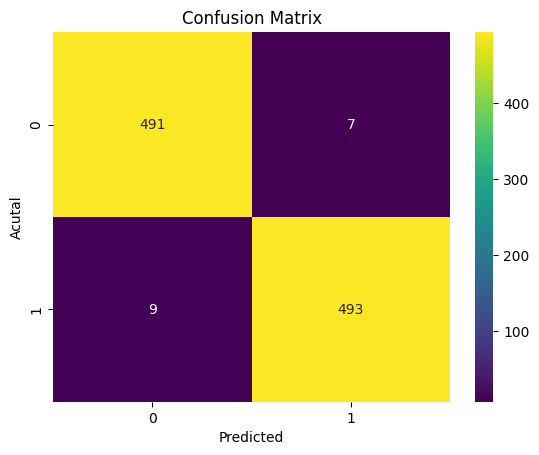

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'viridis', fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.show()

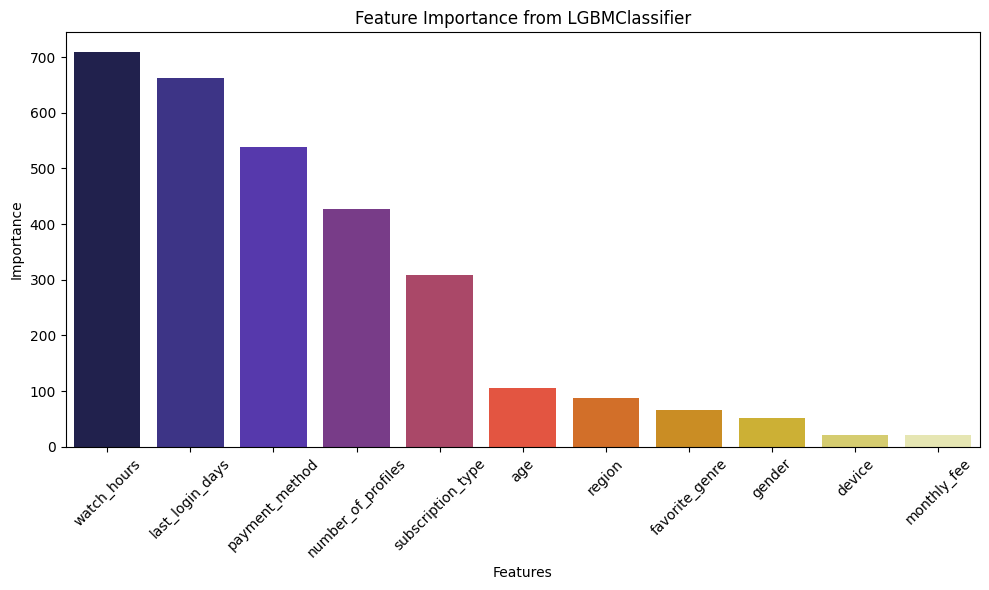

In [46]:
# Feature Importance in sorting order 
imp_fea = model.feature_importances_
fea = X.columns

imp_fea_df = pd.DataFrame({
    'Features': fea,
    'Importance': imp_fea
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(data = imp_fea_df, x = 'Features', y = 'Importance', palette = 'CMRmap')
plt.xticks(rotation = 45)
plt.title("Feature Importance from LGBMClassifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Model Deployment

In [47]:
pickle.dump(model, open('netflix_churn_model.pkl', 'wb'))